In [1]:
import pandas as pd
import numpy as np
import os

### Get list of expanded clones

In [14]:
dir = '/Users/ishaharris/Projects/TCR/TCR-Isha/data/IDH/highconf'
file_name = 'in_vitro_expanded_clones.csv'

df = pd.read_csv(os.path.join(dir, file_name))
df

,nucleotide,aminoAcid,V.name,J.name,freq_t1,count_t1,freq_t2,count_t2,subjectID,sampleID_t1,sampleID_t2,timepoint_t1,timepoint_t2,pval,fdr,lfc,TCR_ID
0,TGTGCCAGCAGACCACCAAGACCCGATTATGGCTACACCTTC,CASRPPRPDYGYTF,TRBV6-1*01,TRBJ1-2*01,0.000000,0,0.051330,5163,donor_1,donor_1_pbmc,donor_1_3rd,pbmc,3rd,0.000000,0.000000,3.617069,invitro1
1,TGTGCCAGCAGCCAAGATAGAACTGGGCTAGCGGGGACCCTATACG...,CASSQDRTGLAGTLYEQYF,TRBV3-1*01,TRBJ2-7*01,0.000000,0,0.029855,3003,donor_1,donor_1_pbmc,donor_1_3rd,pbmc,3rd,0.000000,0.000000,3.381753,invitro2
2,TGTGCCAGCAGGCCAGGGGGACAGGGGAGGAACTATGGCTACACCTTC,CASRPGGQGRNYGYTF,TRBV3-1*01,TRBJ1-2*01,0.000000,0,0.021773,2190,donor_1,donor_1_pbmc,donor_1_3rd,pbmc,3rd,0.000000,0.000000,3.244668,invitro3
3,TGTGCCAGCAGTTACGCAGGGAGTACTGAAGCTTTCTTT,CASSYAGSTEAFF,TRBV12-3*01,TRBJ1-1*01,0.000000,0,0.024855,2500,donor_1,donor_1_pbmc,donor_1_3rd,pbmc,3rd,0.000000,0.000000,3.302152,invitro4
4,TGCAGCGTTGTTCGGTCAGGGGACTATGGCTACACCTTC,CSVVRSGDYGYTF,TRBV29-1*01,TRBJ1-2*01,0.000186,14,0.050438,3219,donor_2,donor_2_pbmc,donor_2_3rd,pbmc,3rd,0.000000,0.000000,2.418165,invitro5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,TGCAGTGCTTTACGACTAGCGTCCTACGAGCAGTACTTC,CSALRLASYEQYF,TRBV20-1*01,TRBJ2-7*01,0.000000,0,0.000349,48,donor_5,donor_5_pbmc,donor_5_3rd,pbmc,3rd,0.000177,0.005505,1.301373,invitro121
121,TGCGCCAGCAGTCTTAGGACAGGGGGTTACGATGAGCAGTTCTTC,CASSLRTGGYDEQFF,TRBV10-1*01,TRBJ2-1*01,0.000000,0,0.000356,49,donor_5,donor_5_pbmc,donor_5_3rd,pbmc,3rd,0.000179,0.005536,1.310236,invitro122
122,TGTGCCAGCAGCTTTAATACGGACAGGGGCTCCTACGAGCAGTACTTC,CASSFNTDRGSYEQYF,TRBV11-2*01,TRBJ2-7*01,0.000000,0,0.000335,46,donor_5,donor_5_pbmc,donor_5_3rd,pbmc,3rd,0.000275,0.008403,1.283084,invitro123
123,TGTGCCAGCGGGGTAGTGGCCTACGAGCAGTACTTC,CASGVVAYEQYF,TRBV7-9*01,TRBJ2-7*01,0.000000,0,0.000342,47,donor_5,donor_5_pbmc,donor_5_3rd,pbmc,3rd,0.000284,0.008600,1.292324,invitro124


HLA types:

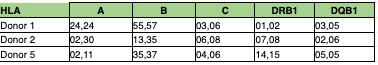

Extract a list of TCR aa, V.name, J.name, frequency, one per patient

In [6]:
# filter df to only include specified cols 
cols = ['aminoAcid', 'V.name', 'J.name', 'freq_t1', 'freq_t2', 'subjectID']
df_filtered = df[cols]

In [7]:
df_filtered

,aminoAcid,V.name,J.name,freq_t1,freq_t2,subjectID
0,CASRPPRPDYGYTF,TRBV6-1*01,TRBJ1-2*01,0.000000,0.051330,donor_1
1,CASSQDRTGLAGTLYEQYF,TRBV3-1*01,TRBJ2-7*01,0.000000,0.029855,donor_1
2,CASRPGGQGRNYGYTF,TRBV3-1*01,TRBJ1-2*01,0.000000,0.021773,donor_1
3,CASSYAGSTEAFF,TRBV12-3*01,TRBJ1-1*01,0.000000,0.024855,donor_1
4,CSVVRSGDYGYTF,TRBV29-1*01,TRBJ1-2*01,0.000186,0.050438,donor_2
...,...,...,...,...,...,...
120,CSALRLASYEQYF,TRBV20-1*01,TRBJ2-7*01,0.000000,0.000349,donor_5
121,CASSLRTGGYDEQFF,TRBV10-1*01,TRBJ2-1*01,0.000000,0.000356,donor_5
122,CASSFNTDRGSYEQYF,TRBV11-2*01,TRBJ2-7*01,0.000000,0.000335,donor_5
123,CASGVVAYEQYF,TRBV7-9*01,TRBJ2-7*01,0.000000,0.000342,donor_5


In [15]:
#rename cols of filtered
df_filtered.rename(columns={
    'aminoAcid': 'amino_acid',
    'V.name': 'v_call',
    'J.name': 'j_call',
    'freq_t1': 'frequency_t1',
    'freq_t2': 'frequency_t2',
    'subjectID': 'subject_id'
}, inplace=True)


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_53726/1172180588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns={


In [16]:
df_filtered

,amino_acid,v_call,j_call,frequency_t1,frequency_t2,subject_id
0,CASRPPRPDYGYTF,TRBV6-1*01,TRBJ1-2*01,0.000000,0.051330,donor_1
1,CASSQDRTGLAGTLYEQYF,TRBV3-1*01,TRBJ2-7*01,0.000000,0.029855,donor_1
2,CASRPGGQGRNYGYTF,TRBV3-1*01,TRBJ1-2*01,0.000000,0.021773,donor_1
3,CASSYAGSTEAFF,TRBV12-3*01,TRBJ1-1*01,0.000000,0.024855,donor_1
4,CSVVRSGDYGYTF,TRBV29-1*01,TRBJ1-2*01,0.000186,0.050438,donor_2
...,...,...,...,...,...,...
120,CSALRLASYEQYF,TRBV20-1*01,TRBJ2-7*01,0.000000,0.000349,donor_5
121,CASSLRTGGYDEQFF,TRBV10-1*01,TRBJ2-1*01,0.000000,0.000356,donor_5
122,CASSFNTDRGSYEQYF,TRBV11-2*01,TRBJ2-7*01,0.000000,0.000335,donor_5
123,CASGVVAYEQYF,TRBV7-9*01,TRBJ2-7*01,0.000000,0.000342,donor_5


In [17]:
# save df_filtered as tsv
df_filtered.to_csv(os.path.join(dir, 'IDH_highconf.tsv'), sep='\t', index=False)

In [19]:
# filter for subjectID = donor_1
df_donor_1 = df_filtered[df_filtered['subject_id'] == 'donor_1']
# filter for donor_2
df_donor_2 = df_filtered[df_filtered['subject_id'] == 'donor_2']
# filter for donor_3
df_donor_5 = df_filtered[df_filtered['subject_id'] == 'donor_5']

In [20]:
# save each donor_df as tsv
df_donor_1.to_csv(os.path.join(dir, 'donor1_IDH_highconf.tsv'), sep='\t', index=False)
df_donor_2.to_csv(os.path.join(dir, 'donor2_IDH_highconf.tsv'), sep='\t', index=False)
df_donor_5.to_csv(os.path.join(dir, 'donor5_IDH_highconf.tsv'), sep='\t', index=False)

### Rewrite the loop so it generates matrices like Inigo's 

Instead of summing the frequency across all CMV associated TCRs, break this down into which contribution from which CMV TCRs

python /Users/ishaharris/Projects/TCR/TCR-Isha/scripts/leven_group_by_tcr.py

In [77]:
# read in donor_5-a02_dist0
dir = '/Users/ishaharris/Projects/TCR/TCR-Isha/data/IDH_Heatmaps/Levenshtein/inigo_style/donor5_A02'
fname = 'donor_5-a02_dist_2_matrix.csv'
df = pd.read_csv(os.path.join(dir, fname))

In [75]:
df

,patient_id,CAIHRGGLGNEQFF,CAISDRDRVVFF,CAISTGGNGYTF,CASGPIRGGTEAFF,CASGVVAYEQYF,CASGYDLGQPQHF,CASIGMVNTEAFF,CASNQVEGHEQYF,CASQGKSNQPQHF,...,CAVLYNEQFF,CSALRLASYEQYF,CSAQLWANTEAFF,CSARDMHEGTHSPLHF,CSARFEGDIAFEAFF,CSARVGVLRNQPQHF,CSVAERSRGRRSNQPQHF,CSVEGRNTEAFF,CSVGIRPGAAYEQYF,CVASSGANVLTF
0,P00002.slim.tsv,0.000830,0.000159,0.009626,0.014895,0.008631,0.006472,0.026425,0.001694,0.016133,...,0.004228,0.001556,0.002838,0.000000,0.000010,0.000527,0.000000,0.012689,0.000051,0.002246
1,P00003.slim.tsv,0.000802,0.000167,0.008138,0.009843,0.022052,0.007257,0.020752,0.002700,0.024628,...,0.004386,0.002654,0.001998,0.000003,0.000011,0.000530,0.000006,0.009076,0.000059,0.002877
2,P00004.slim.tsv,0.001570,0.000146,0.010124,0.011272,0.014463,0.005745,0.023763,0.003637,0.014443,...,0.004413,0.003787,0.004440,0.000017,0.000037,0.000752,0.000002,0.010223,0.000056,0.001738
3,P00006.slim.tsv,0.000966,0.000373,0.014249,0.012049,0.016361,0.006210,0.033514,0.003138,0.016761,...,0.005452,0.004531,0.003583,0.000010,0.000019,0.000619,0.000005,0.011560,0.000096,0.001956
4,P00007.slim.tsv,0.000874,0.000095,0.007437,0.010342,0.014058,0.005562,0.022843,0.001738,0.011794,...,0.003200,0.003835,0.001748,0.000003,0.000023,0.000325,0.000001,0.011163,0.000063,0.002365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,P00653.slim.tsv,0.000660,0.000124,0.011405,0.011872,0.016585,0.007635,0.020020,0.003714,0.017145,...,0.003890,0.004245,0.003675,0.000021,0.000034,0.000953,0.000003,0.011251,0.000081,0.001696
288,P00656.slim.tsv,0.000767,0.000362,0.011762,0.012007,0.020976,0.006779,0.024045,0.005506,0.014120,...,0.005510,0.005544,0.003426,0.000001,0.000016,0.001796,0.000002,0.010826,0.000076,0.001942
289,P00657.slim.tsv,0.000891,0.000202,0.014822,0.014407,0.015156,0.005451,0.027674,0.002667,0.016449,...,0.004009,0.003102,0.003326,0.000025,0.000088,0.001593,0.000008,0.016247,0.000075,0.002142
290,P00662.slim.tsv,0.001006,0.000300,0.014478,0.015169,0.016843,0.006284,0.027558,0.002877,0.014014,...,0.006970,0.004627,0.004377,0.000002,0.000050,0.000618,0.000006,0.013718,0.000049,0.002106


In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# read in donor_5-a02_dist0
dir = '/Users/ishaharris/Projects/TCR/TCR-Isha/data/CMV_Heatmaps'
fname = 'withoutEBV_A01_dist_3_matrix.csv'
df = pd.read_csv(os.path.join(dir, fname), index_col='patient_id')


# Transpose so sequences are rows and patients are columns
heatmap_data = df.T
heatmap_data = heatmap_data.apply(pd.to_numeric, errors='coerce').fillna(0.0)

# Batch size
batch_size = 15
num_patients = heatmap_data.shape[1]

heatmap_data

patient_id,P00002.slim.tsv,P00013.slim.tsv,P00016.slim.tsv,P00018.slim.tsv,P00025.slim.tsv,P00028.slim.tsv,P00036.slim.tsv,P00037.slim.tsv,P00039.slim.tsv,P00047.slim.tsv,...,P00648.slim.tsv,P00651.slim.tsv,P00652.slim.tsv,P00653.slim.tsv,P00656.slim.tsv,P00657.slim.tsv,P00659.slim.tsv,P00662.slim.tsv,P00665.slim.tsv,P00668.slim.tsv
CAPPGTSGGNTGELFF,0.000071,0.000054,0.000053,0.000060,0.000064,0.000057,0.000099,0.000048,0.000082,0.000049,...,0.000041,0.000018,0.000071,0.000048,0.000032,0.000054,0.000086,0.000043,0.000065,0.000048
CASGLGLAGGLSYEQYF,0.000067,0.000281,0.000176,0.000157,0.000218,0.000382,0.000213,0.000338,0.000286,0.000264,...,0.000148,0.000167,0.000182,0.000135,0.000227,0.000102,0.000215,0.000189,0.000123,0.000287
CASGPSNQPQHF,0.006059,0.006661,0.004237,0.005359,0.005881,0.006471,0.006693,0.005798,0.005659,0.004993,...,0.006103,0.005455,0.004911,0.009231,0.005868,0.005750,0.006296,0.005629,0.005223,0.004905
CASGPVDTDTQYF,0.001197,0.001250,0.001097,0.001459,0.001677,0.001248,0.001686,0.001880,0.001176,0.001179,...,0.001746,0.001256,0.001153,0.001404,0.001379,0.001348,0.001360,0.001346,0.001349,0.001602
CASGSGPLYEQYF,0.002631,0.003741,0.003045,0.004926,0.004437,0.004442,0.003399,0.004894,0.003365,0.003654,...,0.004342,0.004324,0.002503,0.002747,0.004233,0.003099,0.004358,0.003573,0.003632,0.003406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CSSYRNTGELFF,0.001899,0.002398,0.001978,0.001316,0.002373,0.002260,0.002596,0.002448,0.002108,0.003644,...,0.004867,0.001548,0.001745,0.002706,0.002422,0.001842,0.002119,0.004820,0.002608,0.002165
CSVAEMTGATEAFF,0.000104,0.000073,0.000042,0.000034,0.000180,0.000038,0.000029,0.000027,0.000041,0.000037,...,0.000049,0.000035,0.000050,0.000023,0.000030,0.000020,0.000022,0.000044,0.000028,0.000056
CSVLAGLTYNEQFF,0.000090,0.000148,0.000157,0.000302,0.000196,0.000381,0.000147,0.000119,0.000127,0.000096,...,0.000118,0.000124,0.000123,0.000095,0.000144,0.000150,0.000088,0.000129,0.000131,0.000137
CSVMGGFGYGYTF,0.000102,0.000197,0.000068,0.000204,0.000182,0.000112,0.000185,0.000089,0.000172,0.000094,...,0.000103,0.000121,0.000159,0.000109,0.000148,0.000101,0.000170,0.000129,0.000558,0.000116


### Adding pgen

FileNotFoundError: [Errno 2] No such file or directory: 'default_models/human_T_beta/model_params.txt'

In [100]:
import olga.load_model as load_model
import olga.generation_probability as pgen



# Load the model parameters (TCR beta, in this example)
seq_type = 'TCR'
chain = 'beta'
model_path = 'olga_default_models/human_T_beta/'

params = load_model(model_path, seq_type, chain)
model = GenerationProbability(params)

# Example CDR3 sequence (AA)
cdr3_seq = 'CASSIRSSYEQYF'
result = gen_prob.compute_aa_CDR3_pgen(cdr3_seq)
print(f"Pgen for {cdr3_seq} = {result}")


def compute_pgen_stub(seq: str) -> float:
    return model.compute_aa_CDR3_pgen(seq)

sequences = heatmap_data.index.tolist()
pgens = [compute_pgen_stub(seq) for seq in sequences]

heatmap_data['Pgen'] = pgens
print(heatmap_data)

TypeError: 'module' object is not callable

### Draw heatmap

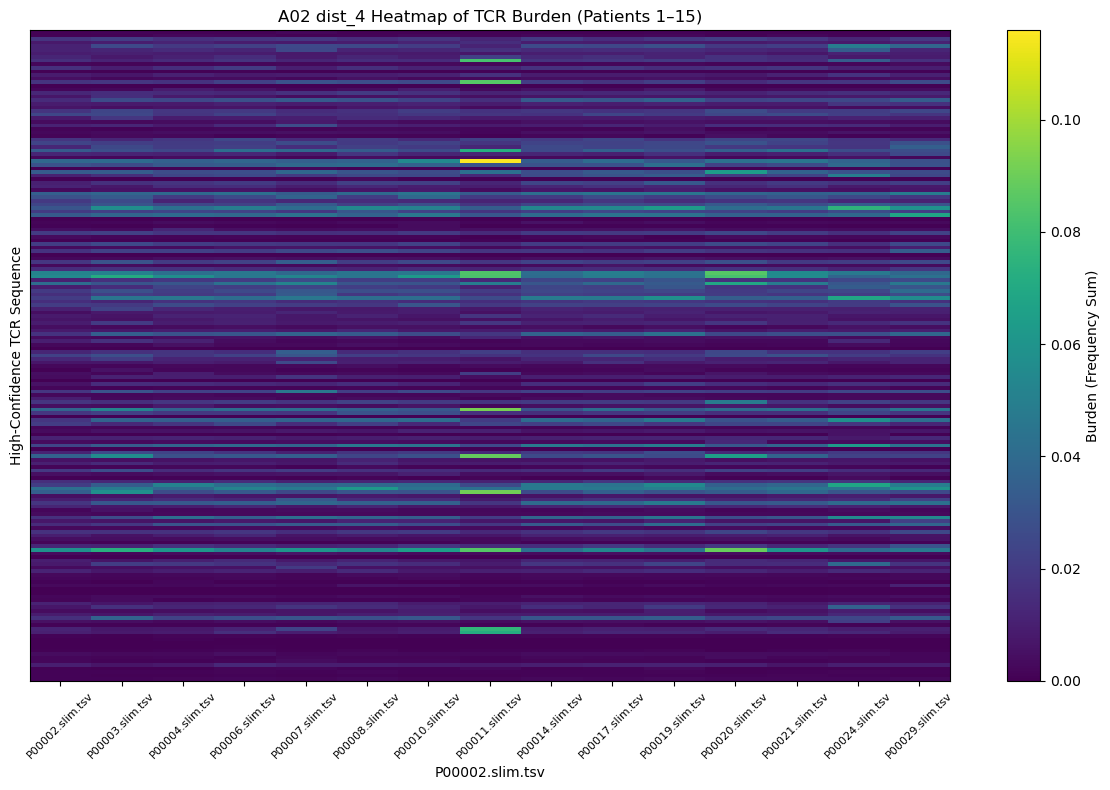

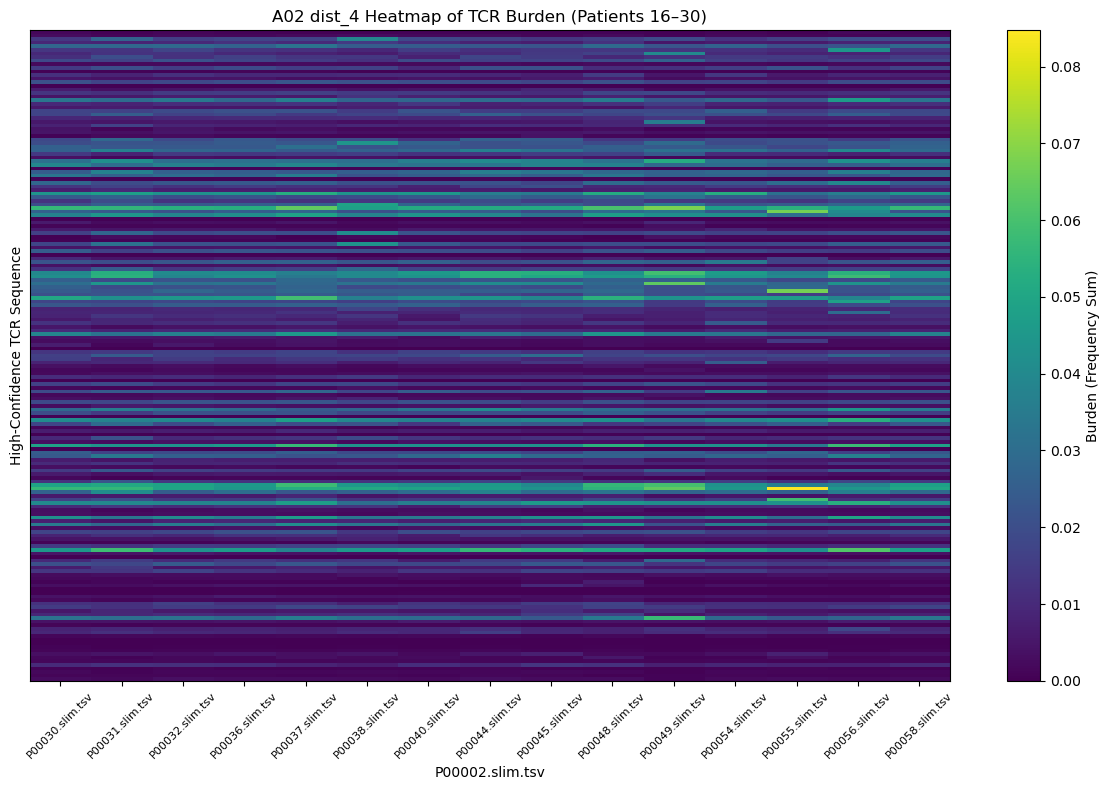

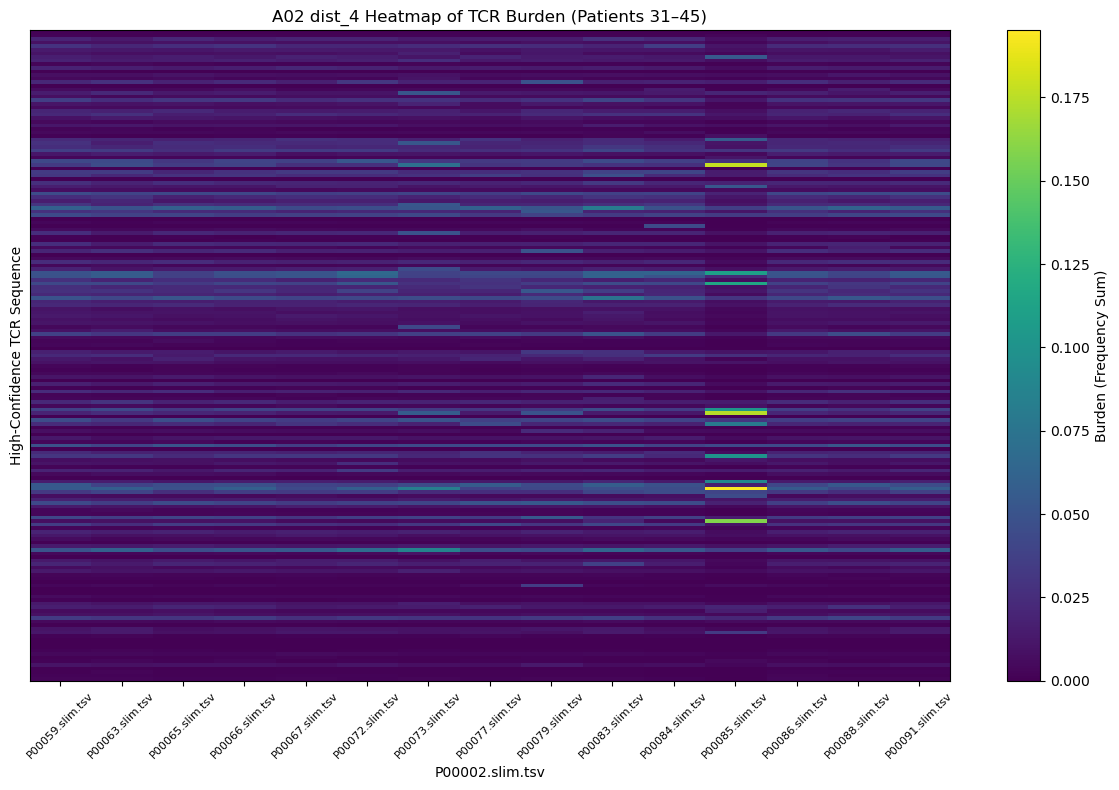

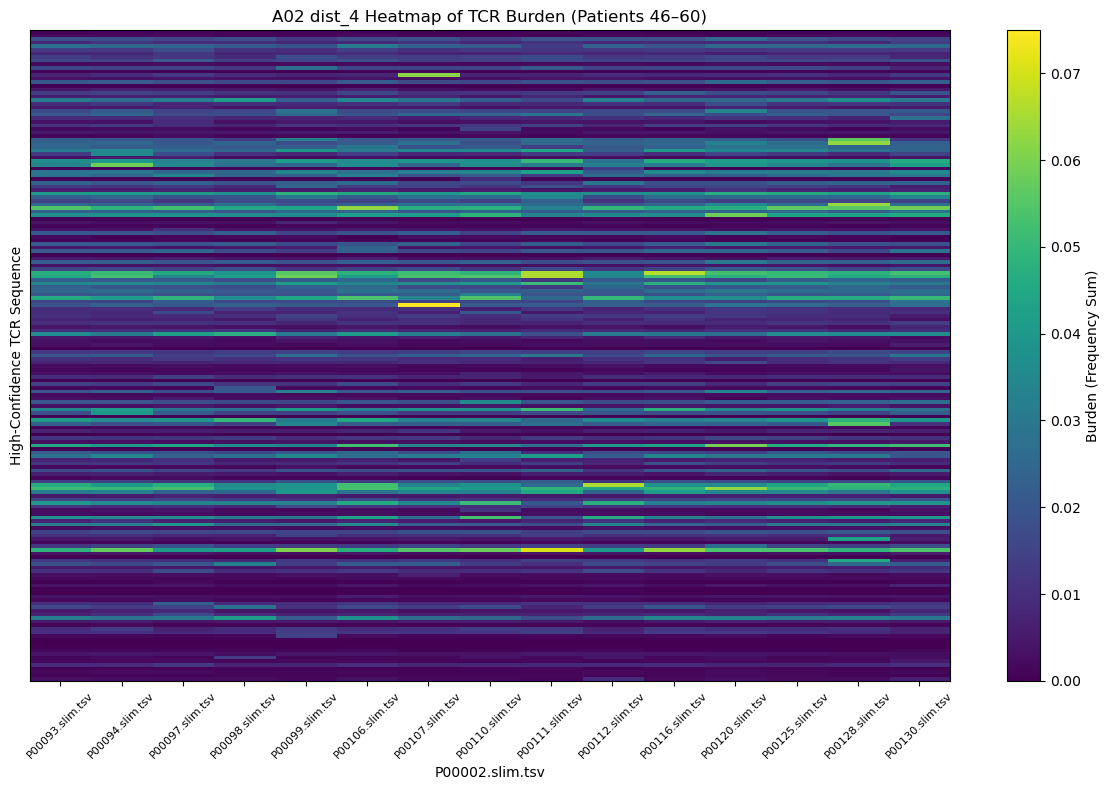

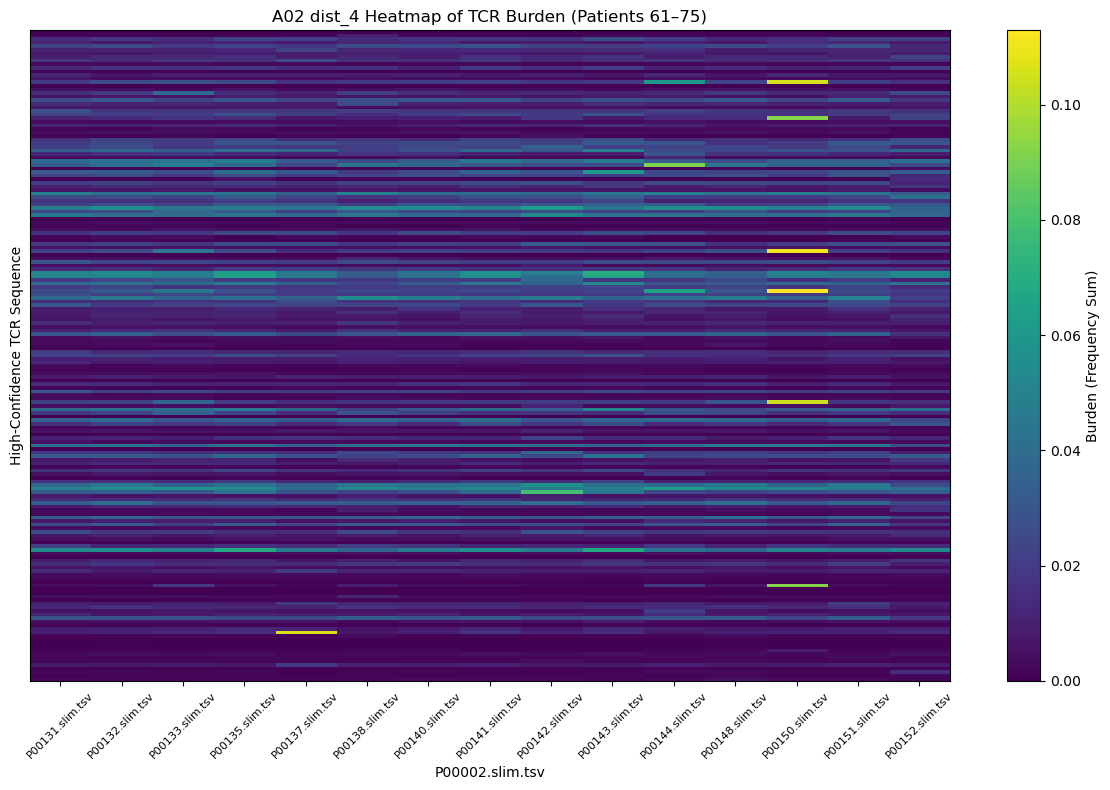

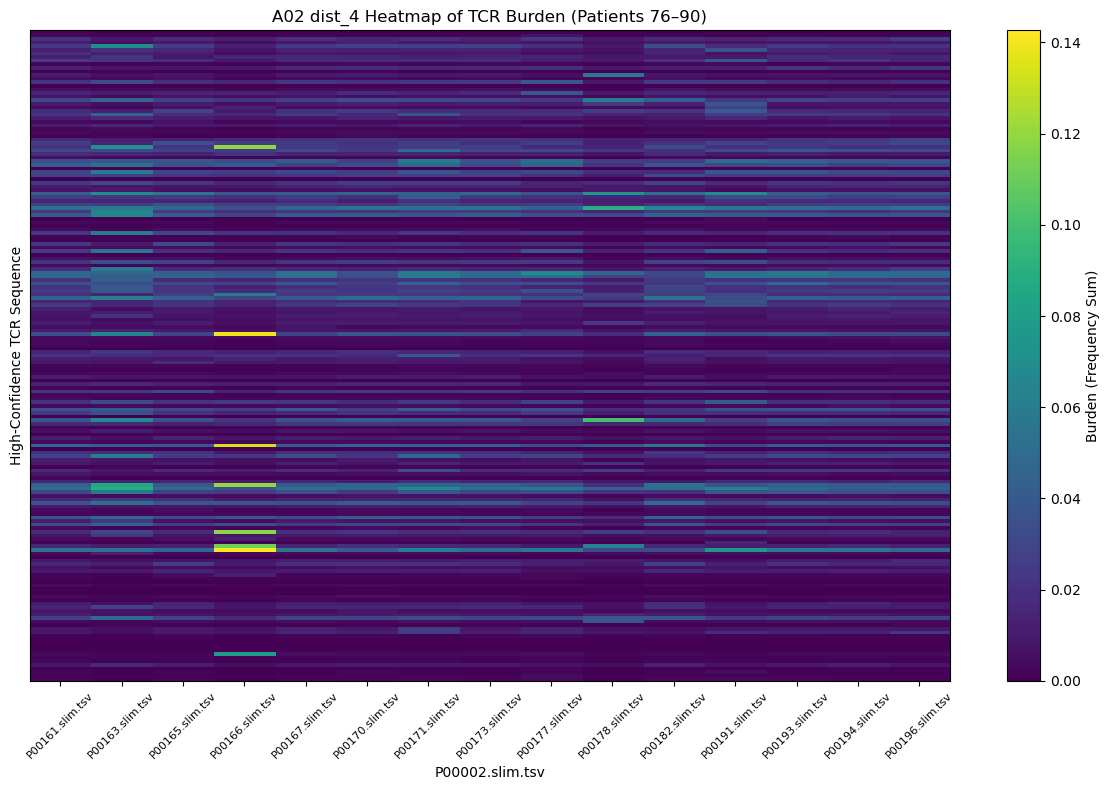

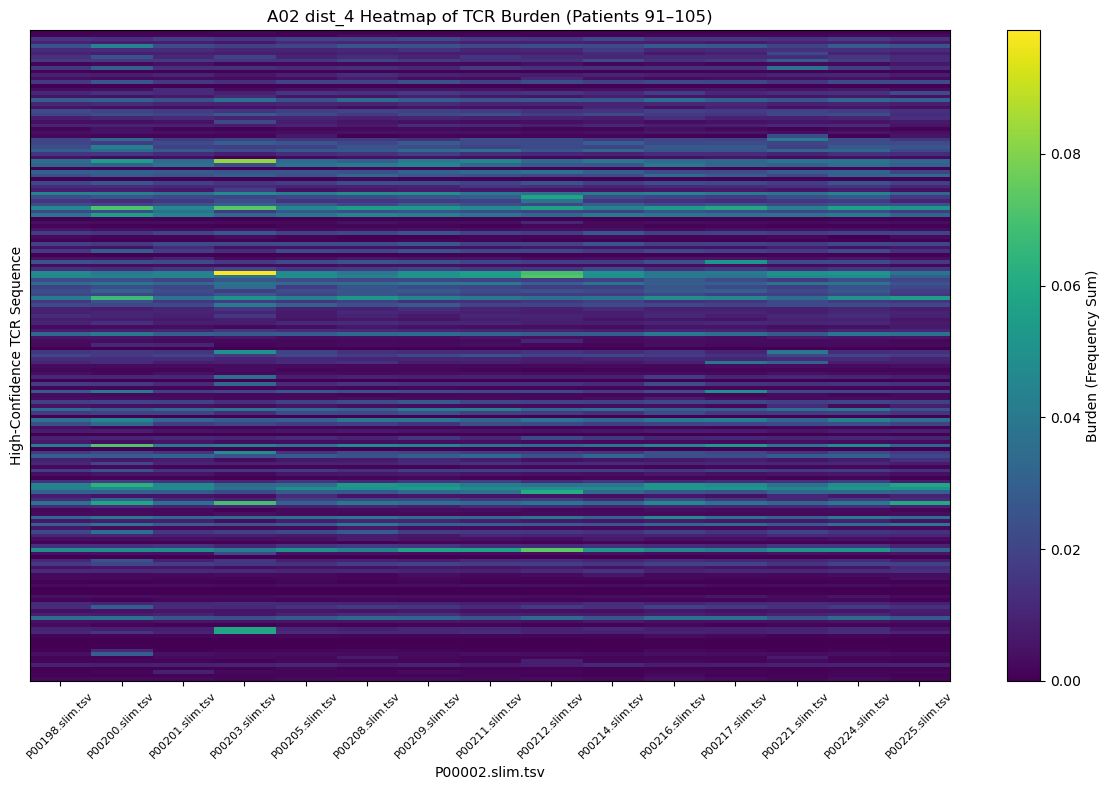

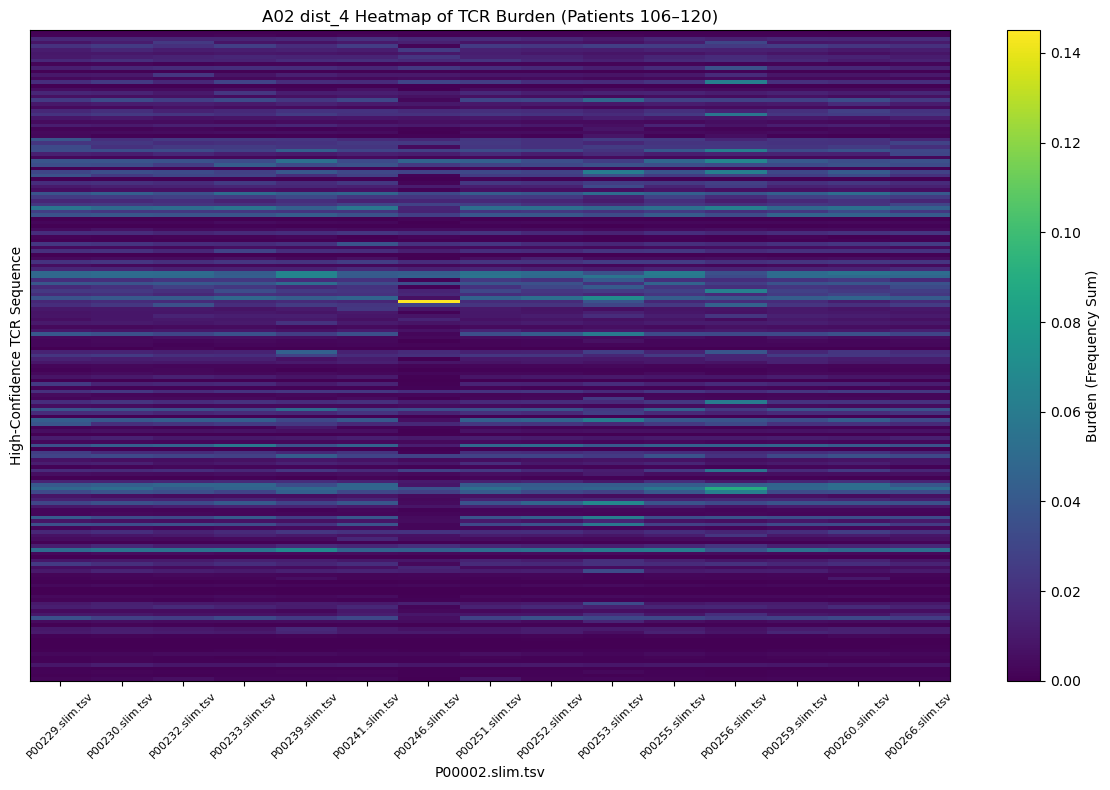

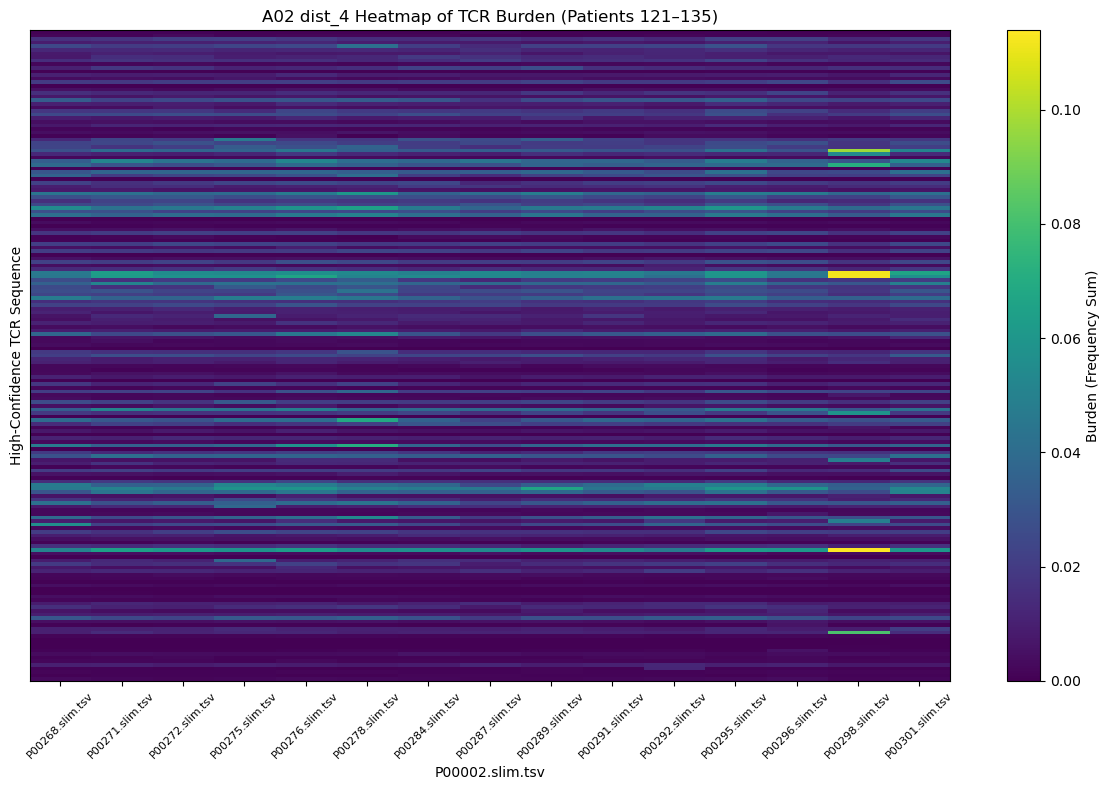

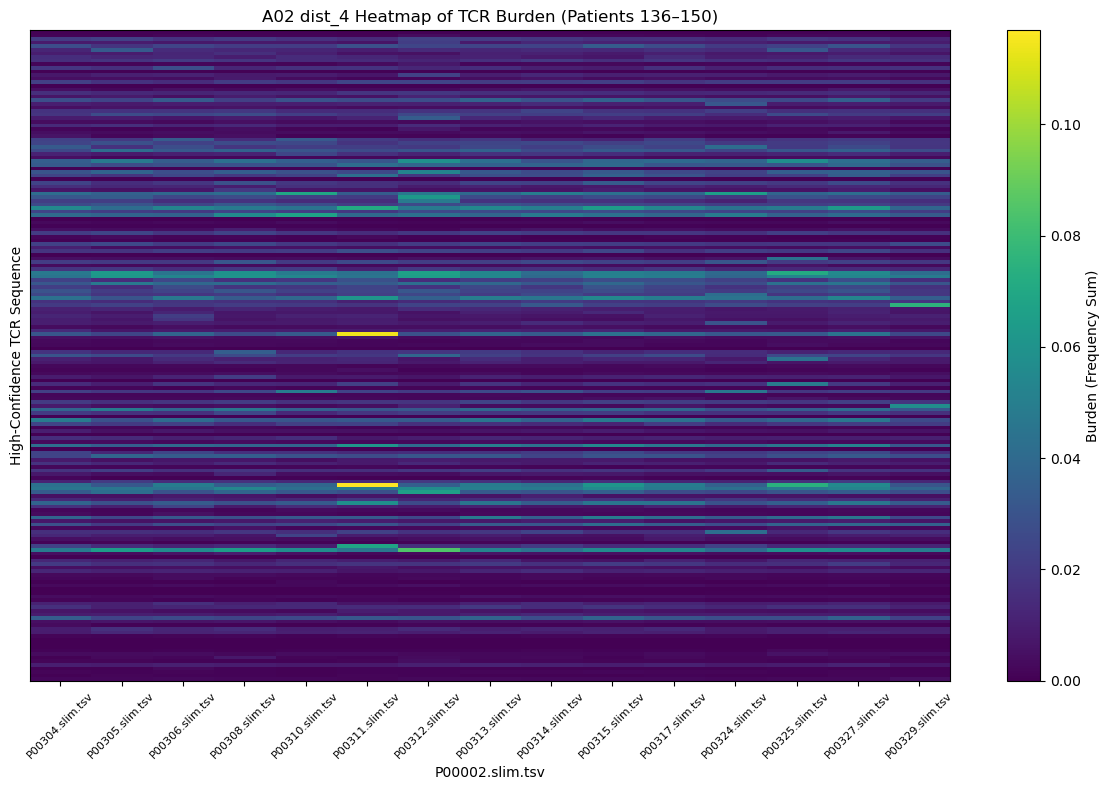

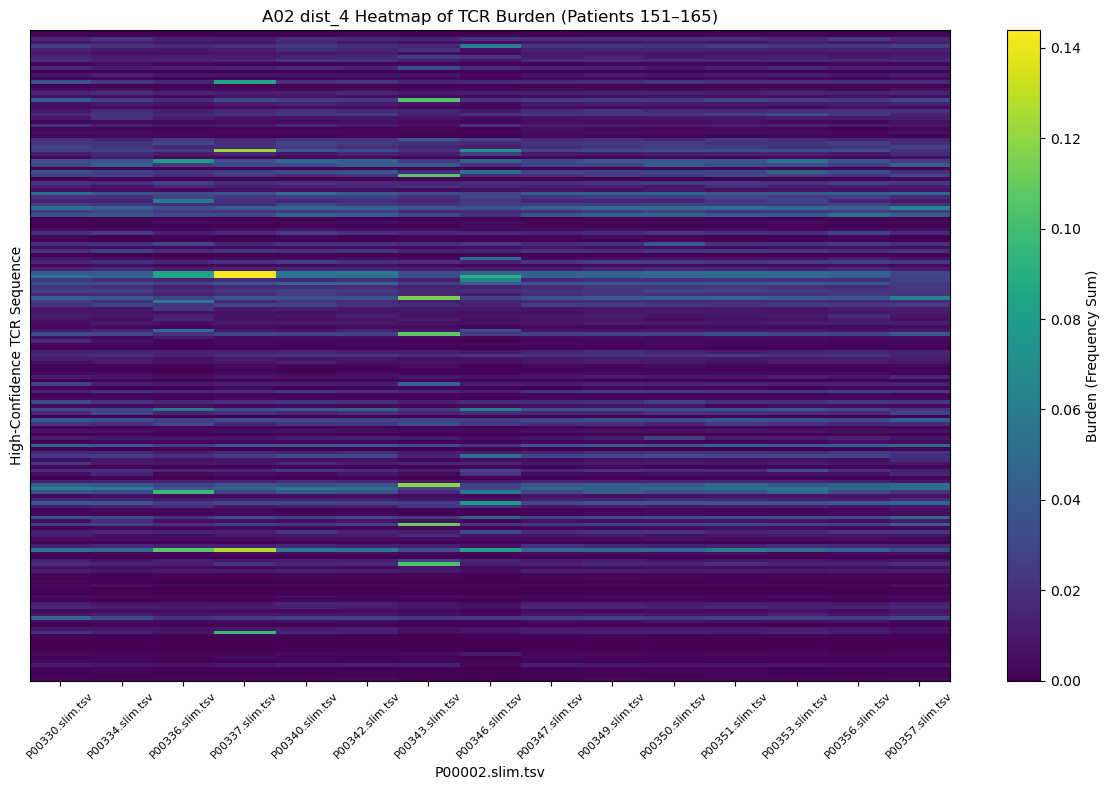

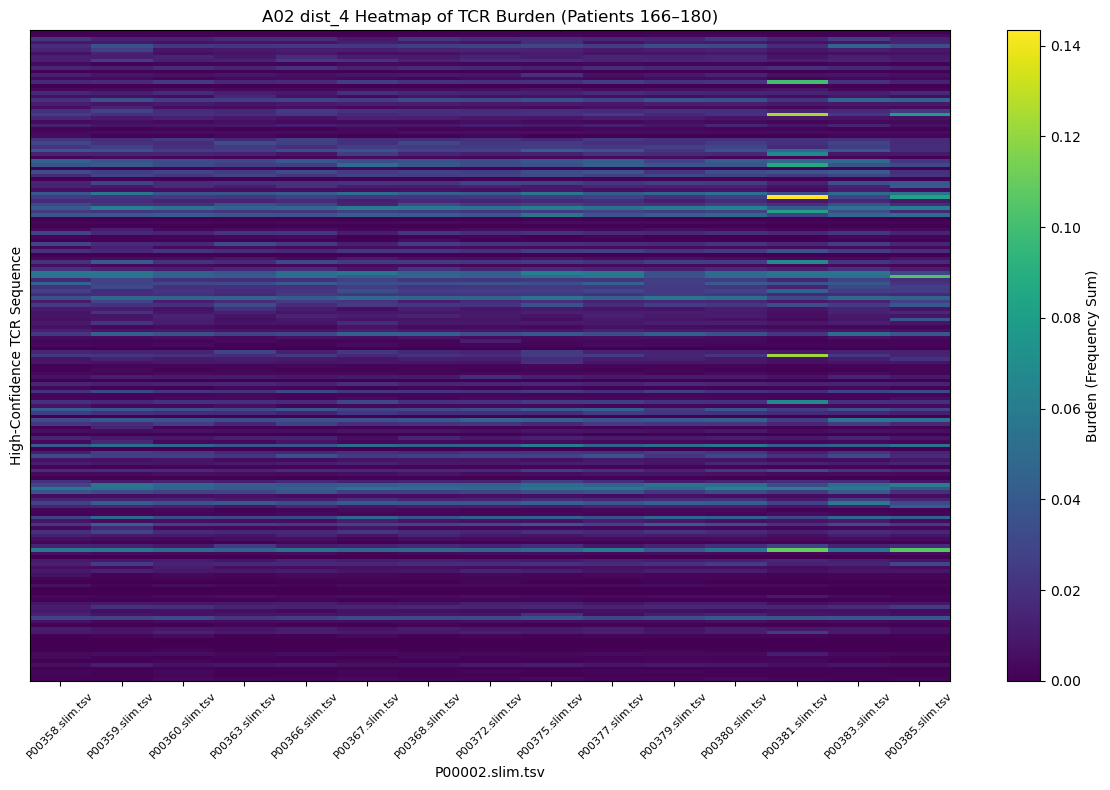

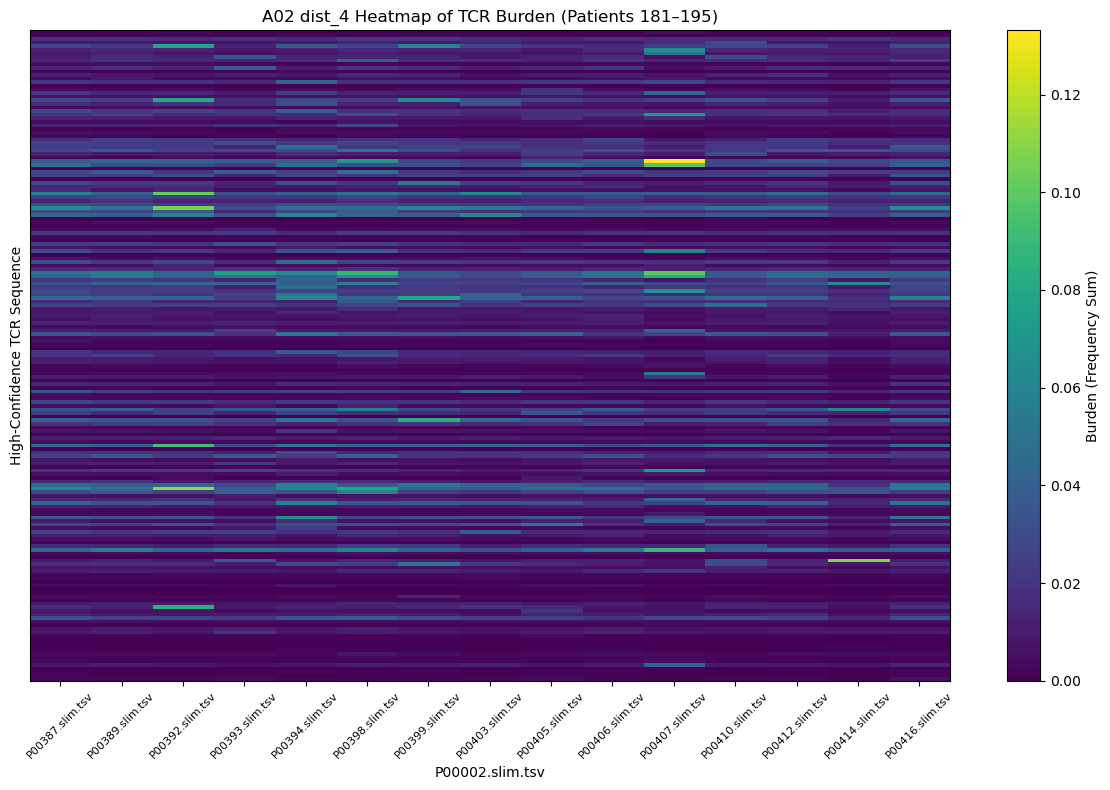

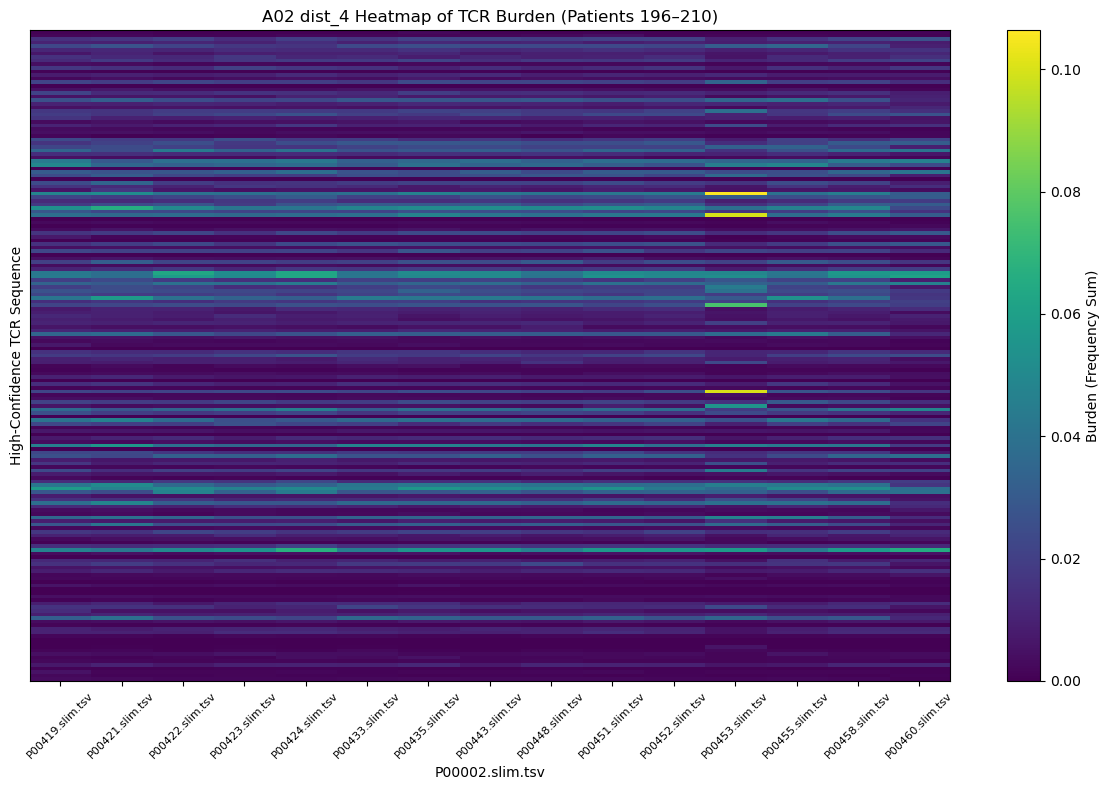

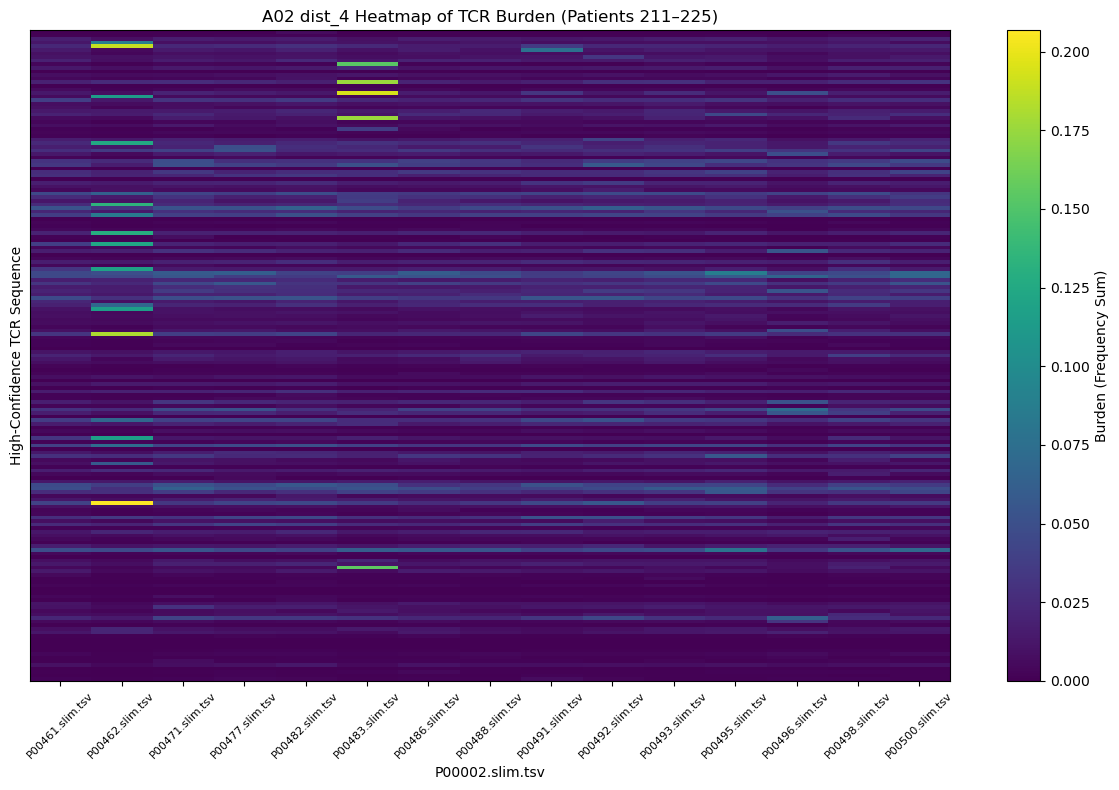

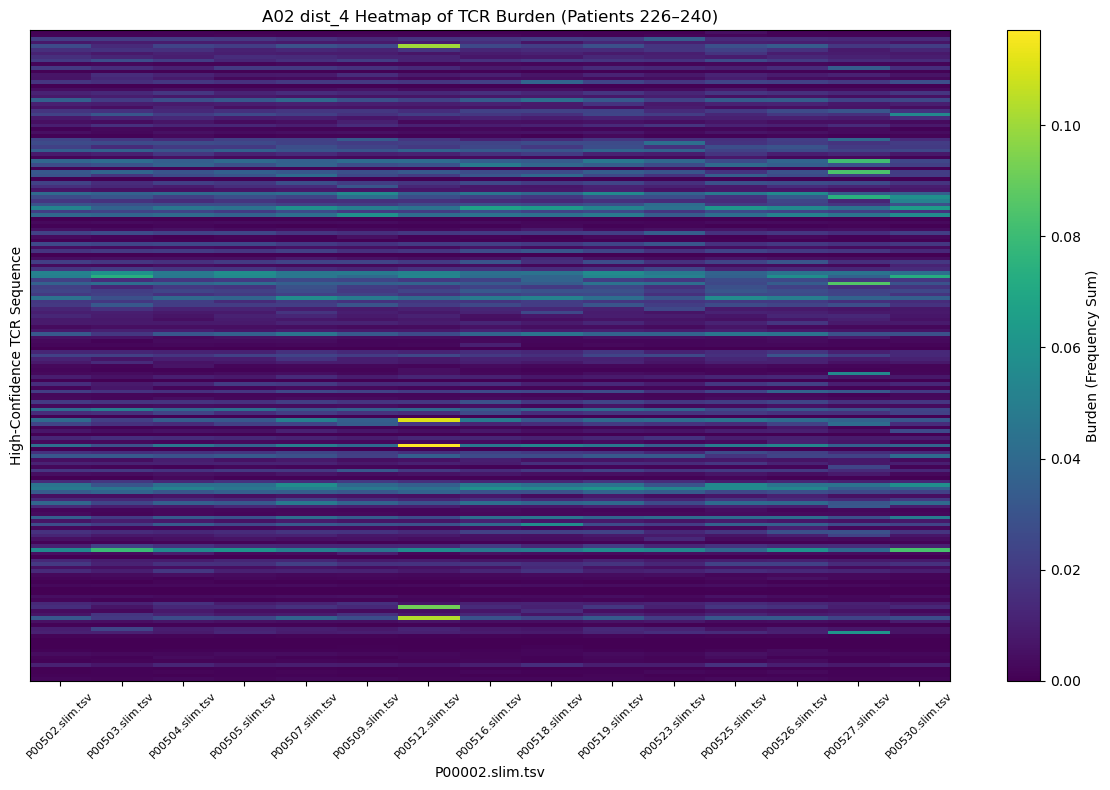

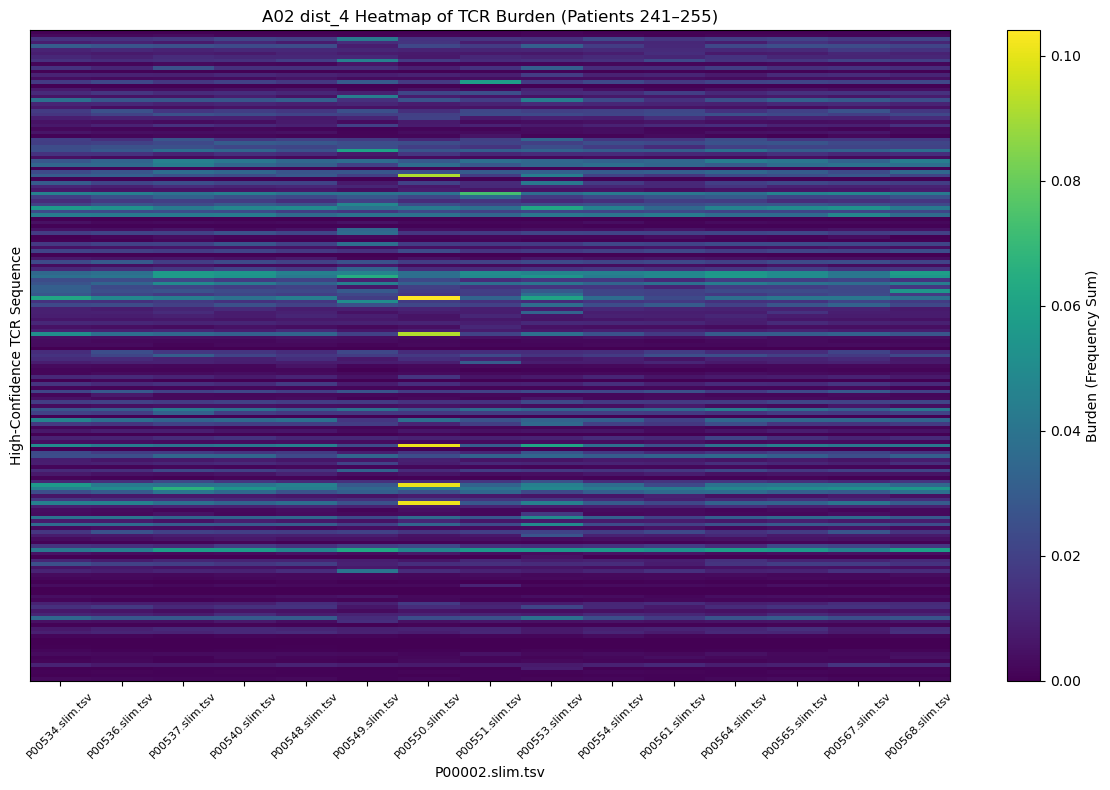

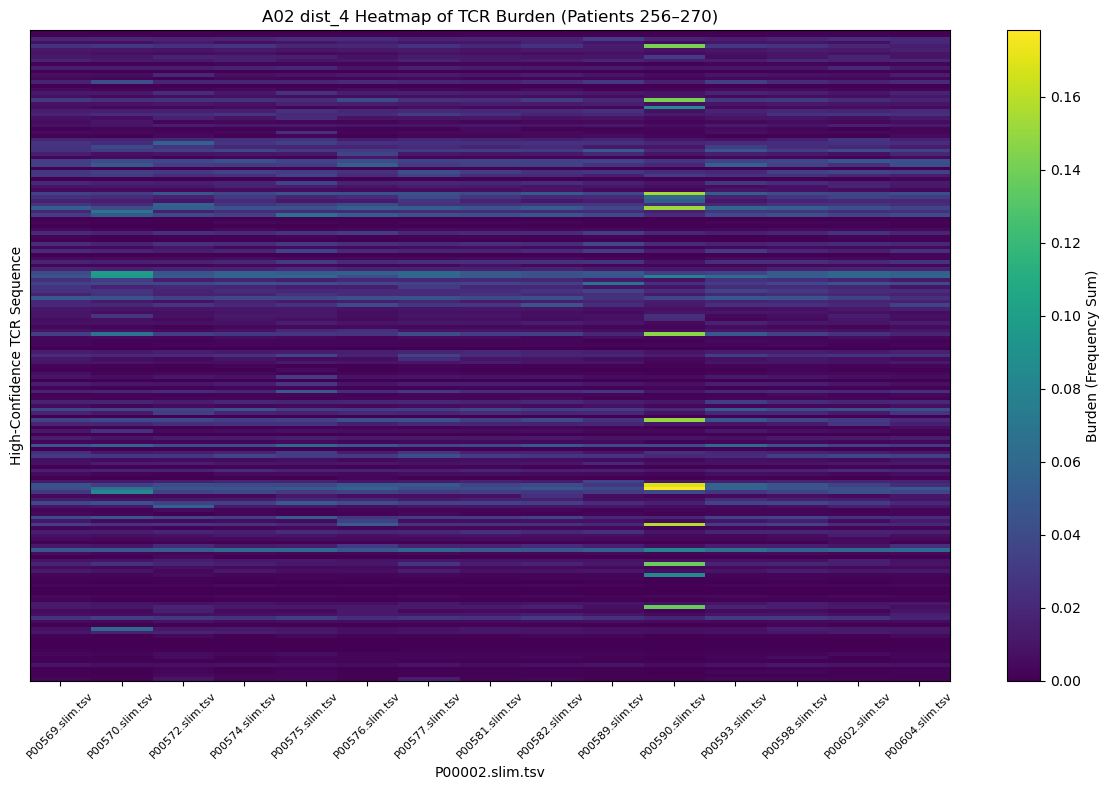

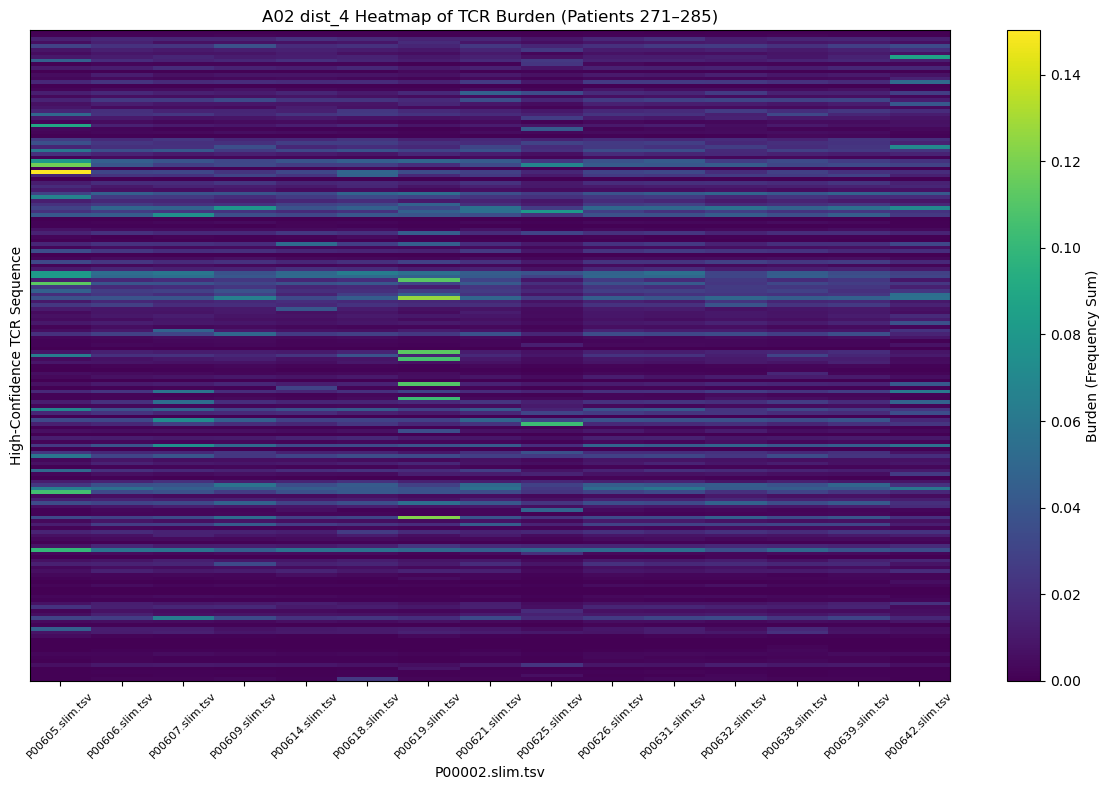

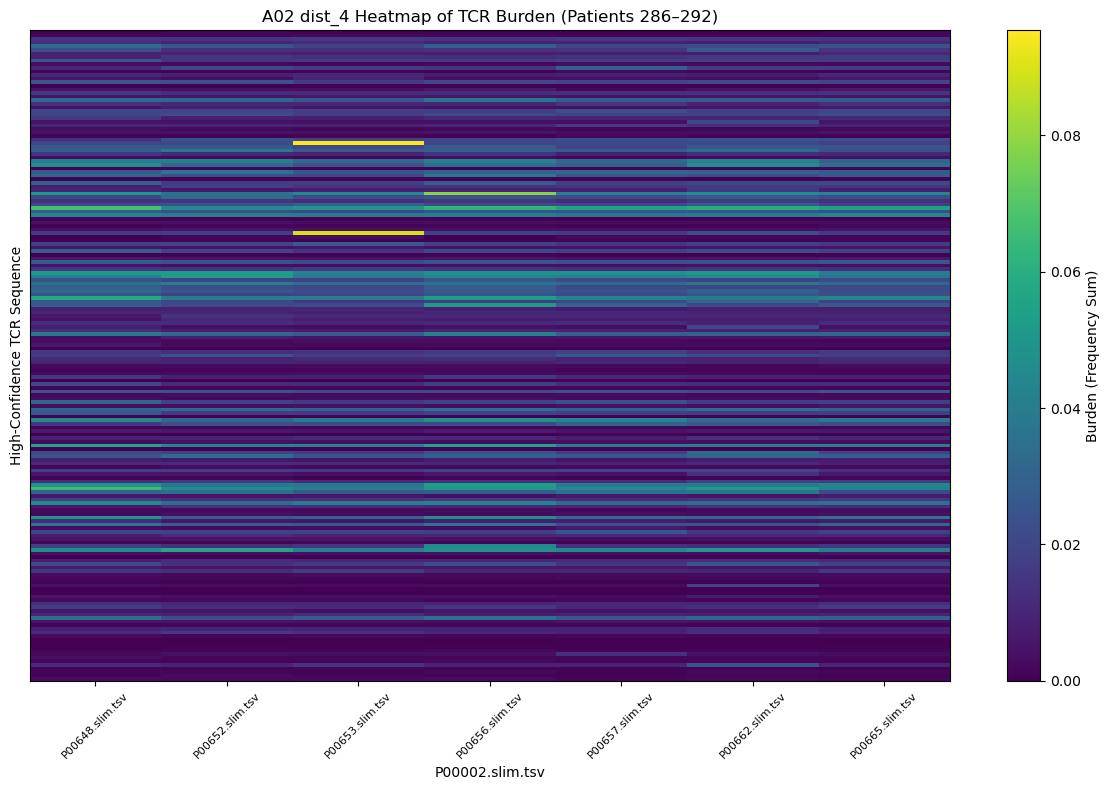

In [119]:
# load data

import os
import pandas as pd
import matplotlib.pyplot as plt

# Define base directory and HLA/dist values
base_dir = '/Users/ishaharris/Projects/TCR/TCR-Isha/data/CMV_Heatmaps'
hla = 'A02'
dist = 4

# Create dynamic subfolder name
subfolder_name = f'{hla}_dist_{dist}'
figs_dir = os.path.join(base_dir, subfolder_name)
os.makedirs(figs_dir, exist_ok=True)  # Create subfolder if it doesn't exist

# Read in the relevant matrix CSV
fname = f'withoutEBV_{hla}_dist_{dist}_matrix.csv'
df = pd.read_csv(os.path.join(base_dir, fname), index_col='patient_id')

# Transpose so sequences are rows and patients are columns
heatmap_data = df.T
heatmap_data = heatmap_data.apply(pd.to_numeric, errors='coerce').fillna(0.0)

# global min and max for color scaling
global_min = heatmap_data.values.min()
global_max = heatmap_data.values.max()

# Batch size
batch_size = 15
num_patients = heatmap_data.shape[1]

# Loop through batches of patients
for i in range(0, num_patients, batch_size):
    batch = heatmap_data.iloc[:, i:i + batch_size]

    plt.figure(figsize=(12, 8))
    #plt.imshow(batch.values, aspect='auto', vmin=0, vmax=global_max, cmap='viridis')
    plt.imshow(batch.values, aspect='auto')
    plt.colorbar(label='Burden (Frequency Sum)')

    plt.xticks(range(len(batch.columns)), batch.columns, rotation=45, fontsize=8)
    #plt.yticks(range(len(batch.index)), batch.index, fontsize=8)
    plt.yticks([],[])  # Hide y-ticks for better readability

    plt.xlabel(heatmap_data.columns[0])
    plt.ylabel('High-Confidence TCR Sequence')
    plt.title(f'{hla} dist_{dist} Heatmap of TCR Burden (Patients {i+1}–{min(i+batch_size, num_patients)})')
    plt.tight_layout()

    # Save and show the figure
    fname_out = f'heatmap_batch_{i+1}_to_{min(i+batch_size, num_patients)}.png'
    plt.savefig(os.path.join(figs_dir, fname_out), dpi=300)
    plt.show()
